<a href="https://colab.research.google.com/github/thiimdg/sleep-quality-predict/blob/main/HealthSleepStatistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Projeto de Análise e Predição da Qualidade de Sono

##1) Carregamento dos Dados e Visualização inicial do Dataset

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/Health_Sleep_Statistics.csv")
df.head()

,User ID,Age,Gender,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage
0,1,25,f,8,23:00,06:30,8000,2500,medium,healthy,no,no
1,2,34,m,7,00:30,07:00,5000,2200,low,unhealthy,yes,yes
2,3,29,f,9,22:45,06:45,9000,2700,high,healthy,no,no
3,4,41,m,5,01:00,06:30,4000,2100,low,unhealthy,yes,no
4,5,22,f,8,23:30,07:00,10000,2800,high,medium,no,no


In [ ]:
df.size

1000

In [ ]:
df.describe()

,Age,Gender,Sleep Quality,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage,Sleep Time
count,100.000000,100.000000,100.000000,100.000000,100.00000,100.00000,100.000000,100.000000,100.000000,100.000000
mean,36.010000,0.500000,7.000000,6830.000000,2421.00000,1.10000,0.880000,0.260000,0.200000,7.043500
std,8.454865,0.502519,1.734964,2498.706736,281.06759,0.78496,0.832181,0.440844,0.402015,1.115539
min,22.000000,0.000000,4.000000,3000.000000,2000.00000,0.00000,0.000000,0.000000,0.000000,4.700000
25%,28.750000,0.000000,5.750000,4750.000000,2175.00000,0.00000,0.000000,0.000000,0.000000,6.562500
50%,35.000000,0.500000,7.500000,6750.000000,2400.00000,1.00000,1.000000,0.000000,0.000000,7.000000
75%,44.000000,1.000000,8.250000,9000.000000,2700.00000,2.00000,2.000000,1.000000,0.000000,8.000000
max,50.000000,1.000000,9.000000,11000.000000,2900.00000,2.00000,2.000000,1.000000,1.000000,9.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   User ID                  100 non-null    int64 
 1   Age                      100 non-null    int64 
 2   Gender                   100 non-null    object
 3   Sleep Quality            100 non-null    int64 
 4   Bedtime                  100 non-null    object
 5   Wake-up Time             100 non-null    object
 6   Daily Steps              100 non-null    int64 
 7   Calories Burned          100 non-null    int64 
 8   Physical Activity Level  100 non-null    object
 9   Dietary Habits           100 non-null    object
 10  Sleep Disorders          100 non-null    object
 11  Medication Usage         100 non-null    object
dtypes: int64(5), object(7)
memory usage: 9.5+ KB


#2) Limpeza e Processamento dos Dados

In [ ]:
df.isna().sum()

,0
Age,0
Gender,0
Sleep Quality,0
Daily Steps,0
Calories Burned,0
Physical Activity Level,0
Dietary Habits,0
Sleep Disorders,0
Medication Usage,0
Sleep Time,0


In [ ]:
df.drop("User ID", axis=1, inplace=True)

In [ ]:
df.head()

,Age,Gender,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage
0,25,f,8,23:00,06:30,8000,2500,medium,healthy,no,no
1,34,m,7,00:30,07:00,5000,2200,low,unhealthy,yes,yes
2,29,f,9,22:45,06:45,9000,2700,high,healthy,no,no
3,41,m,5,01:00,06:30,4000,2100,low,unhealthy,yes,no
4,22,f,8,23:30,07:00,10000,2800,high,medium,no,no


In [ ]:
df["Physical Activity Level"].unique()

array(['medium', 'low', 'high'], dtype=object)

Convertendo variáveis categóricas em valores numéricos

In [ ]:
df["Physical Activity Level"] = df["Physical Activity Level"].map({"low": 0, "medium": 1, "high": 2})
df["Dietary Habits"] = df["Dietary Habits"].map({"unhealthy": 0, "medium": 1, "healthy": 2})
df["Sleep Disorders"] = df["Sleep Disorders"].map({"no": 0, "yes": 1})
df["Medication Usage"] = df["Medication Usage"].map({"no": 0, "yes": 1})
df["Gender"] = df["Gender"].map({"m": 0, "f": 1})

In [ ]:
df.head()

,Age,Gender,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage
0,25,1,8,23:00,06:30,8000,2500,1,2,0,0
1,34,0,7,00:30,07:00,5000,2200,0,0,1,1
2,29,1,9,22:45,06:45,9000,2700,2,2,0,0
3,41,0,5,01:00,06:30,4000,2100,0,0,1,0
4,22,1,8,23:30,07:00,10000,2800,2,1,0,0


Formatando as variáveis que estão em formato de horas

In [ ]:
def hour_format(column):
  column = column.str.replace(":",".")
  return column.astype(float)



In [ ]:
df["Bedtime"] = hour_format(df["Bedtime"])
df["Wake-up Time"] = hour_format(df["Wake-up Time"])

In [ ]:
df.head()

,Age,Gender,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage
0,25,1,8,23.00,6.30,8000,2500,1,2,0,0
1,34,0,7,0.30,7.00,5000,2200,0,0,1,1
2,29,1,9,22.45,6.45,9000,2700,2,2,0,0
3,41,0,5,1.00,6.30,4000,2100,0,0,1,0
4,22,1,8,23.30,7.00,10000,2800,2,1,0,0


Criando uma nova variável para tempo total de sono

In [ ]:
df["Sleep Time"]  = (df["Wake-up Time"] - df["Bedtime"])%24

In [ ]:
df.drop(["Bedtime","Wake-up Time"], axis=1, inplace=True)

In [ ]:
df.head()

,Age,Gender,Sleep Quality,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage,Sleep Time
0,25,1,8,8000,2500,1,2,0,0,7.3
1,34,0,7,5000,2200,0,0,1,1,6.7
2,29,1,9,9000,2700,2,2,0,0,8.0
3,41,0,5,4000,2100,0,0,1,0,5.3
4,22,1,8,10000,2800,2,1,0,0,7.7


#3) Análise de Correlação

In [ ]:
df.corr()

,Age,Gender,Sleep Quality,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage,Sleep Time
Age,1.000000,-0.780982,-0.848356,-0.873456,-0.861680,-0.777887,-0.808083,0.652411,0.483805,-0.791379
Gender,-0.780982,1.000000,0.822584,0.848691,0.833158,0.742614,0.797092,-0.547153,-0.450000,0.759045
Sleep Quality,-0.848356,0.822584,1.000000,0.976277,0.973557,0.875203,0.902498,-0.818806,-0.579284,0.919854
Daily Steps,-0.873456,0.848691,0.976277,1.000000,0.986750,0.884245,0.903340,-0.793930,-0.569146,0.890874
Calories Burned,-0.861680,0.833158,0.973557,0.986750,1.000000,0.869424,0.917775,-0.770047,-0.564974,0.895234
Physical Activity Level,-0.777887,0.742614,0.875203,0.884245,0.869424,1.000000,0.776253,-0.834831,-0.512148,0.803037
Dietary Habits,-0.808083,0.797092,0.902498,0.903340,0.917775,0.776253,1.000000,-0.629967,-0.531395,0.839152
Sleep Disorders,0.652411,-0.547153,-0.818806,-0.793930,-0.770047,-0.834831,-0.629967,1.000000,0.501557,-0.783201
Medication Usage,0.483805,-0.450000,-0.579284,-0.569146,-0.564974,-0.512148,-0.531395,0.501557,1.000000,-0.476824
Sleep Time,-0.791379,0.759045,0.919854,0.890874,0.895234,0.803037,0.839152,-0.783201,-0.476824,1.000000


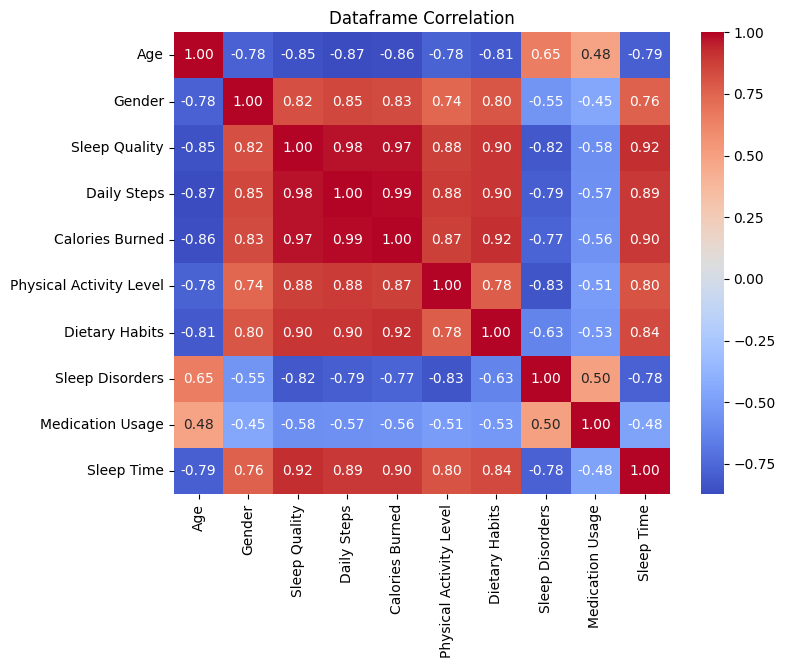

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Dataframe Correlation")
plt.show()

##Visualização das maiores correlações

Age vs Sleep Quality

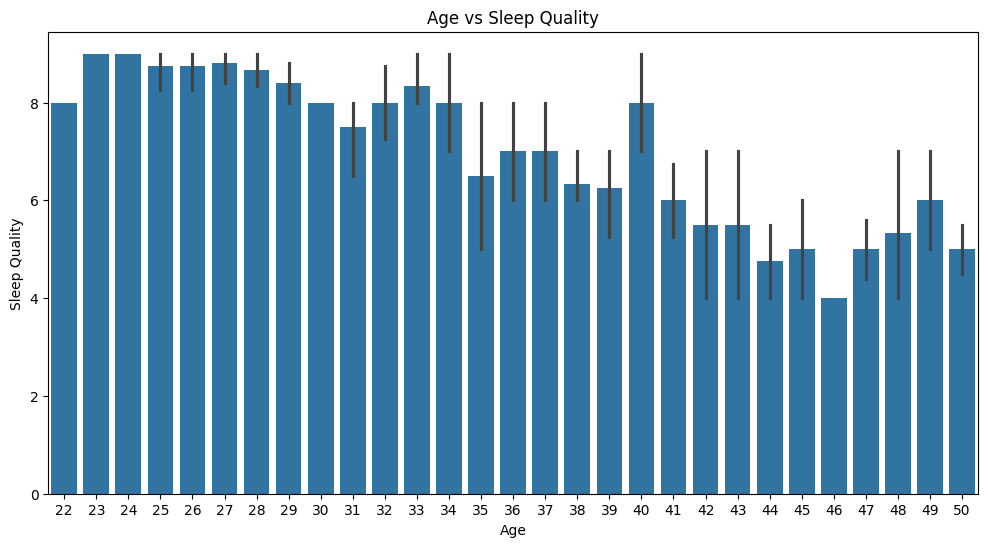

In [ ]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'Age', y = 'Sleep Quality', data = df)
plt.title("Age vs Sleep Quality")
plt.xlabel("Age")
plt.ylabel("Sleep Quality")
plt.show()

Daily Steps vs Sleep Quality

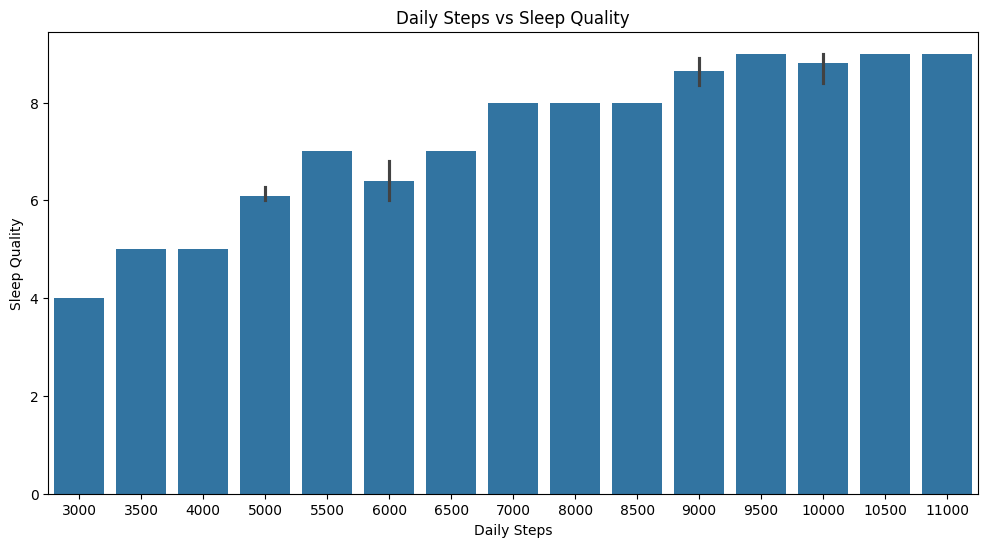

In [ ]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'Daily Steps', y = 'Sleep Quality', data = df)
plt.title("Daily Steps vs Sleep Quality")
plt.xlabel("Daily Steps")
plt.ylabel("Sleep Quality")
plt.show()

Calories Burned vs sleep quality

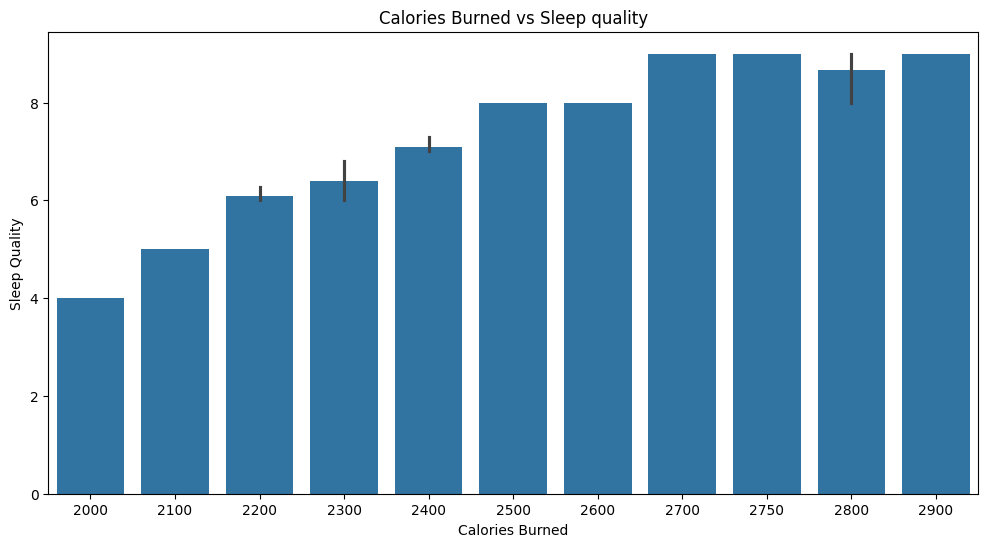

In [ ]:
plt.figure(figsize = (12, 6))
sns.barplot(x = 'Calories Burned', y = 'Sleep Quality', data = df)
plt.xlabel("Calories Burned")
plt.ylabel("Sleep Quality")
plt.title("Calories Burned vs Sleep quality")
plt.show()

Dietary Habits vs Sleep Quality

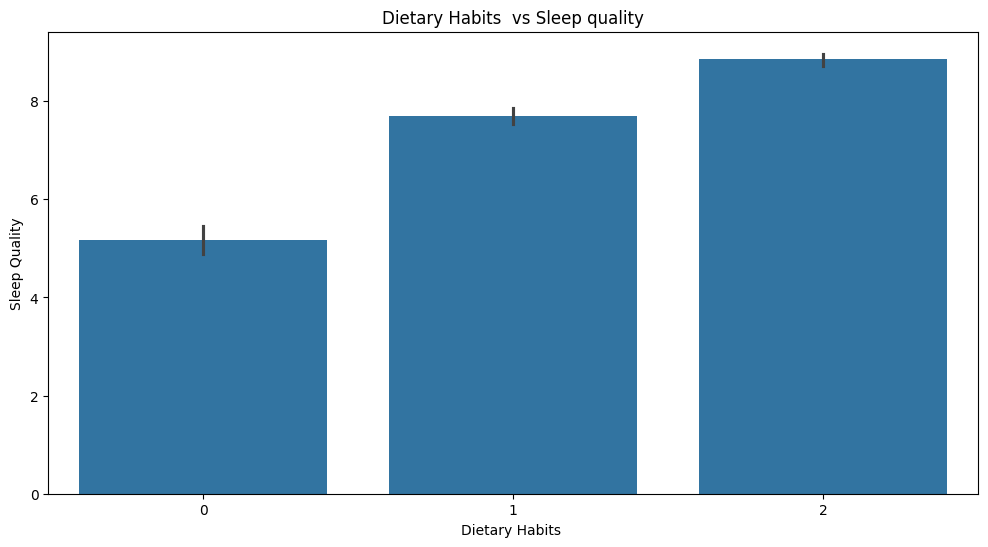

In [ ]:
plt.figure(figsize = (12, 6))
sns.barplot(x = 'Dietary Habits', y = 'Sleep Quality', data = df)
plt.xlabel("Dietary Habits ")
plt.ylabel("Sleep Quality")
plt.title("Dietary Habits  vs Sleep quality")
plt.show()

Sleep Time vs Sleep Quality


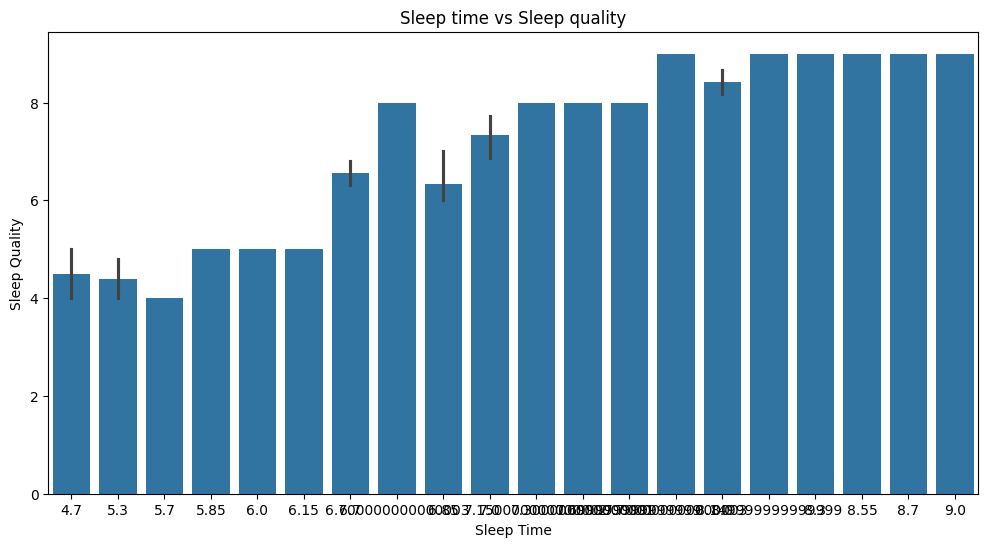

In [ ]:
plt.figure(figsize = (12, 6))
sns.barplot(x = 'Sleep Time', y = 'Sleep Quality', data = df)
plt.xlabel("Sleep Time")
plt.ylabel("Sleep Quality")
plt.title("Sleep time vs Sleep quality")
plt.show()

Physical Activity vs Sleep Quality


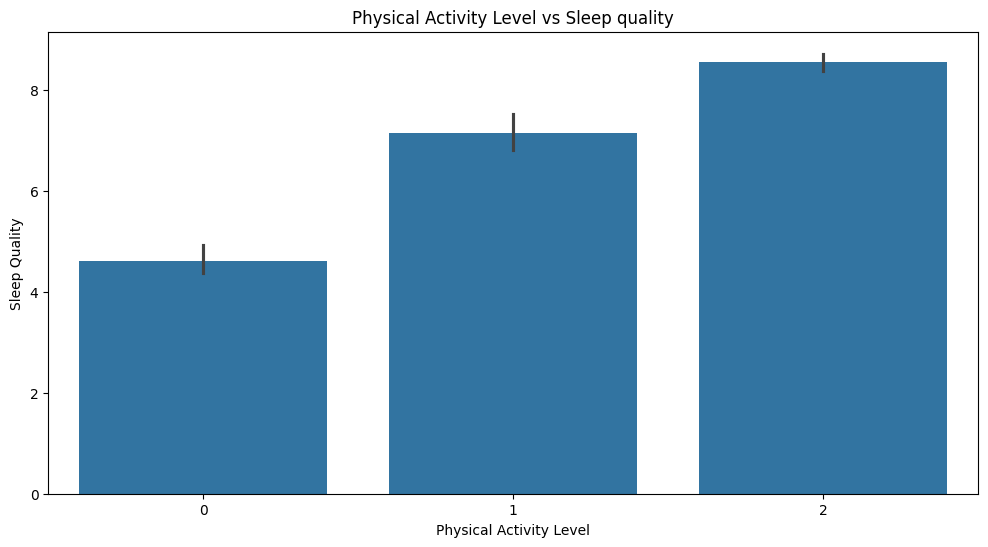

In [ ]:
plt.figure(figsize = (12, 6))
sns.barplot(x = 'Physical Activity Level', y = 'Sleep Quality', data = df)
plt.xlabel("Physical Activity Level")
plt.ylabel("Sleep Quality")
plt.title("Physical Activity Level vs Sleep quality")
plt.show()

#4) Preparação dos Dados e Treinamento dos Modelos de ML

=== LinearRegression() ===


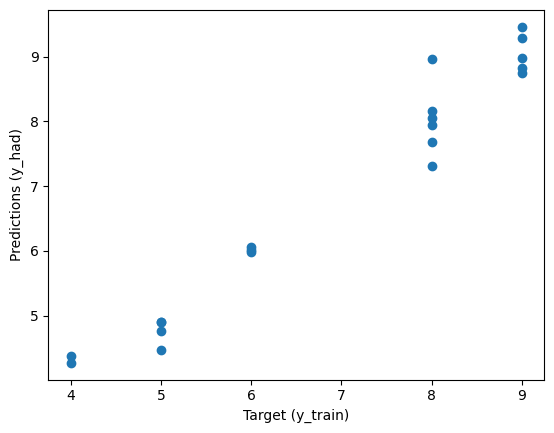

Mean Absolute Error: 0.2559717402915252
Mean Squared Error: 0.12496599768363299
Root Mean Squared Error: 0.3535053007857633
R-squared score 0.9626129475817733
=== RandomForestRegressor() ===


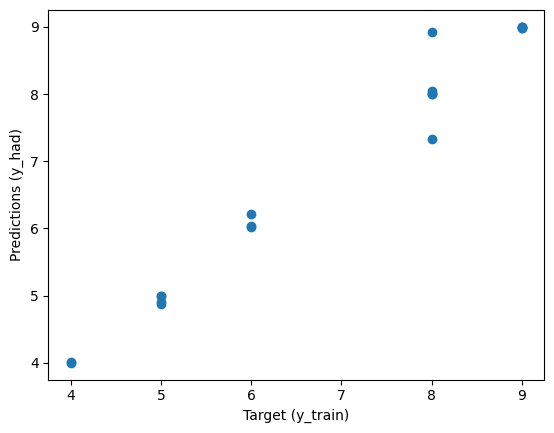

Mean Absolute Error: 0.10999999999999992
Mean Squared Error: 0.06864999999999996
Root Mean Squared Error: 0.262011450131478
R-squared score 0.9789190460661067


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics


model_list = [ LinearRegression(),
               RandomForestRegressor(),
              ]

y = df["Sleep Quality"]
x = df.drop(["Sleep Quality", "Medication Usage"], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

for m in model_list:
    print("===", m, "===")
    m.fit(x_train, y_train)
    y_hat = m.predict(x_test)
    plt.scatter(y_test, y_hat)
    plt.xlabel('Target (y_train)')
    plt.ylabel('Predictions (y_had)')
    plt.show()
    print("Mean Absolute Error:", metrics.mean_absolute_error(y_hat, y_test))
    print("Mean Squared Error:", metrics.mean_squared_error(y_hat, y_test))
    print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_hat, y_test)))
    print("R-squared score", metrics.r2_score(y_hat, y_test))


#Considerações Finais

O modelo Random Forest demonstrou ser um pouco mais robusto para prever a qualidade do sono, superando a abordagem linear.

O Random Forest aprenstou uma precisão maior (R² 0.98 vs 0.96 da Regressão Linear).

E Erros menores (MAE de 0.11 contra 0.25 da Regressão Linear), que indica que suas previsões estão mais próximas dos valores reais